In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import scipy
import scipy.stats as st 
import re

In [2]:
with open("../results/ASVs_w_taxa.csv", "r") as file:
    lines = [line.strip() for line in file]
liao_intra = pd.read_csv("../results/tbl_opt_coefs_intra.csv")*21
liao_oral = pd.read_csv("../results/tbl_opt_coefs_oral.csv")*21
p_vals = pd.read_csv("../results/antibiotic_adj.p.vals.csv", index_col=0).T
ests = pd.read_csv("../results/antibiotic_est.csv", index_col=0).T
ests[p_vals > 0.05] = 0
ests = ests.iloc[:, 1:]
asv_order = ["_".join(l.split()[0:2]) for l in lines]
ests = ests.loc[asv_order]
ests.index = lines
liao_intra.index = lines
liao_oral.index = lines

In [3]:
vanc_df = pd.concat([ests["glycopeptide_antibiotics_intravenous"],
                     ests["glycopeptide_antibiotics_oral"]], axis=1)
carb_df = pd.concat([ests["carbapenems_intravenous"]], axis=1)
liao_vanc_df = pd.concat([liao_intra["glycopeptide_antibiotics"], liao_oral["glycopeptide_antibiotics"]], axis=1)
liao_vanc_df.columns = ["Intravenous", "Oral"]
vanc_df.columns = ["Intravenous", "Oral"]
carb_df.columns = ["Intravenous"]
liao_carb_df = pd.concat([liao_intra["carbapenems"]], axis=1)
liao_carb_df.columns = ["Intravenous"]

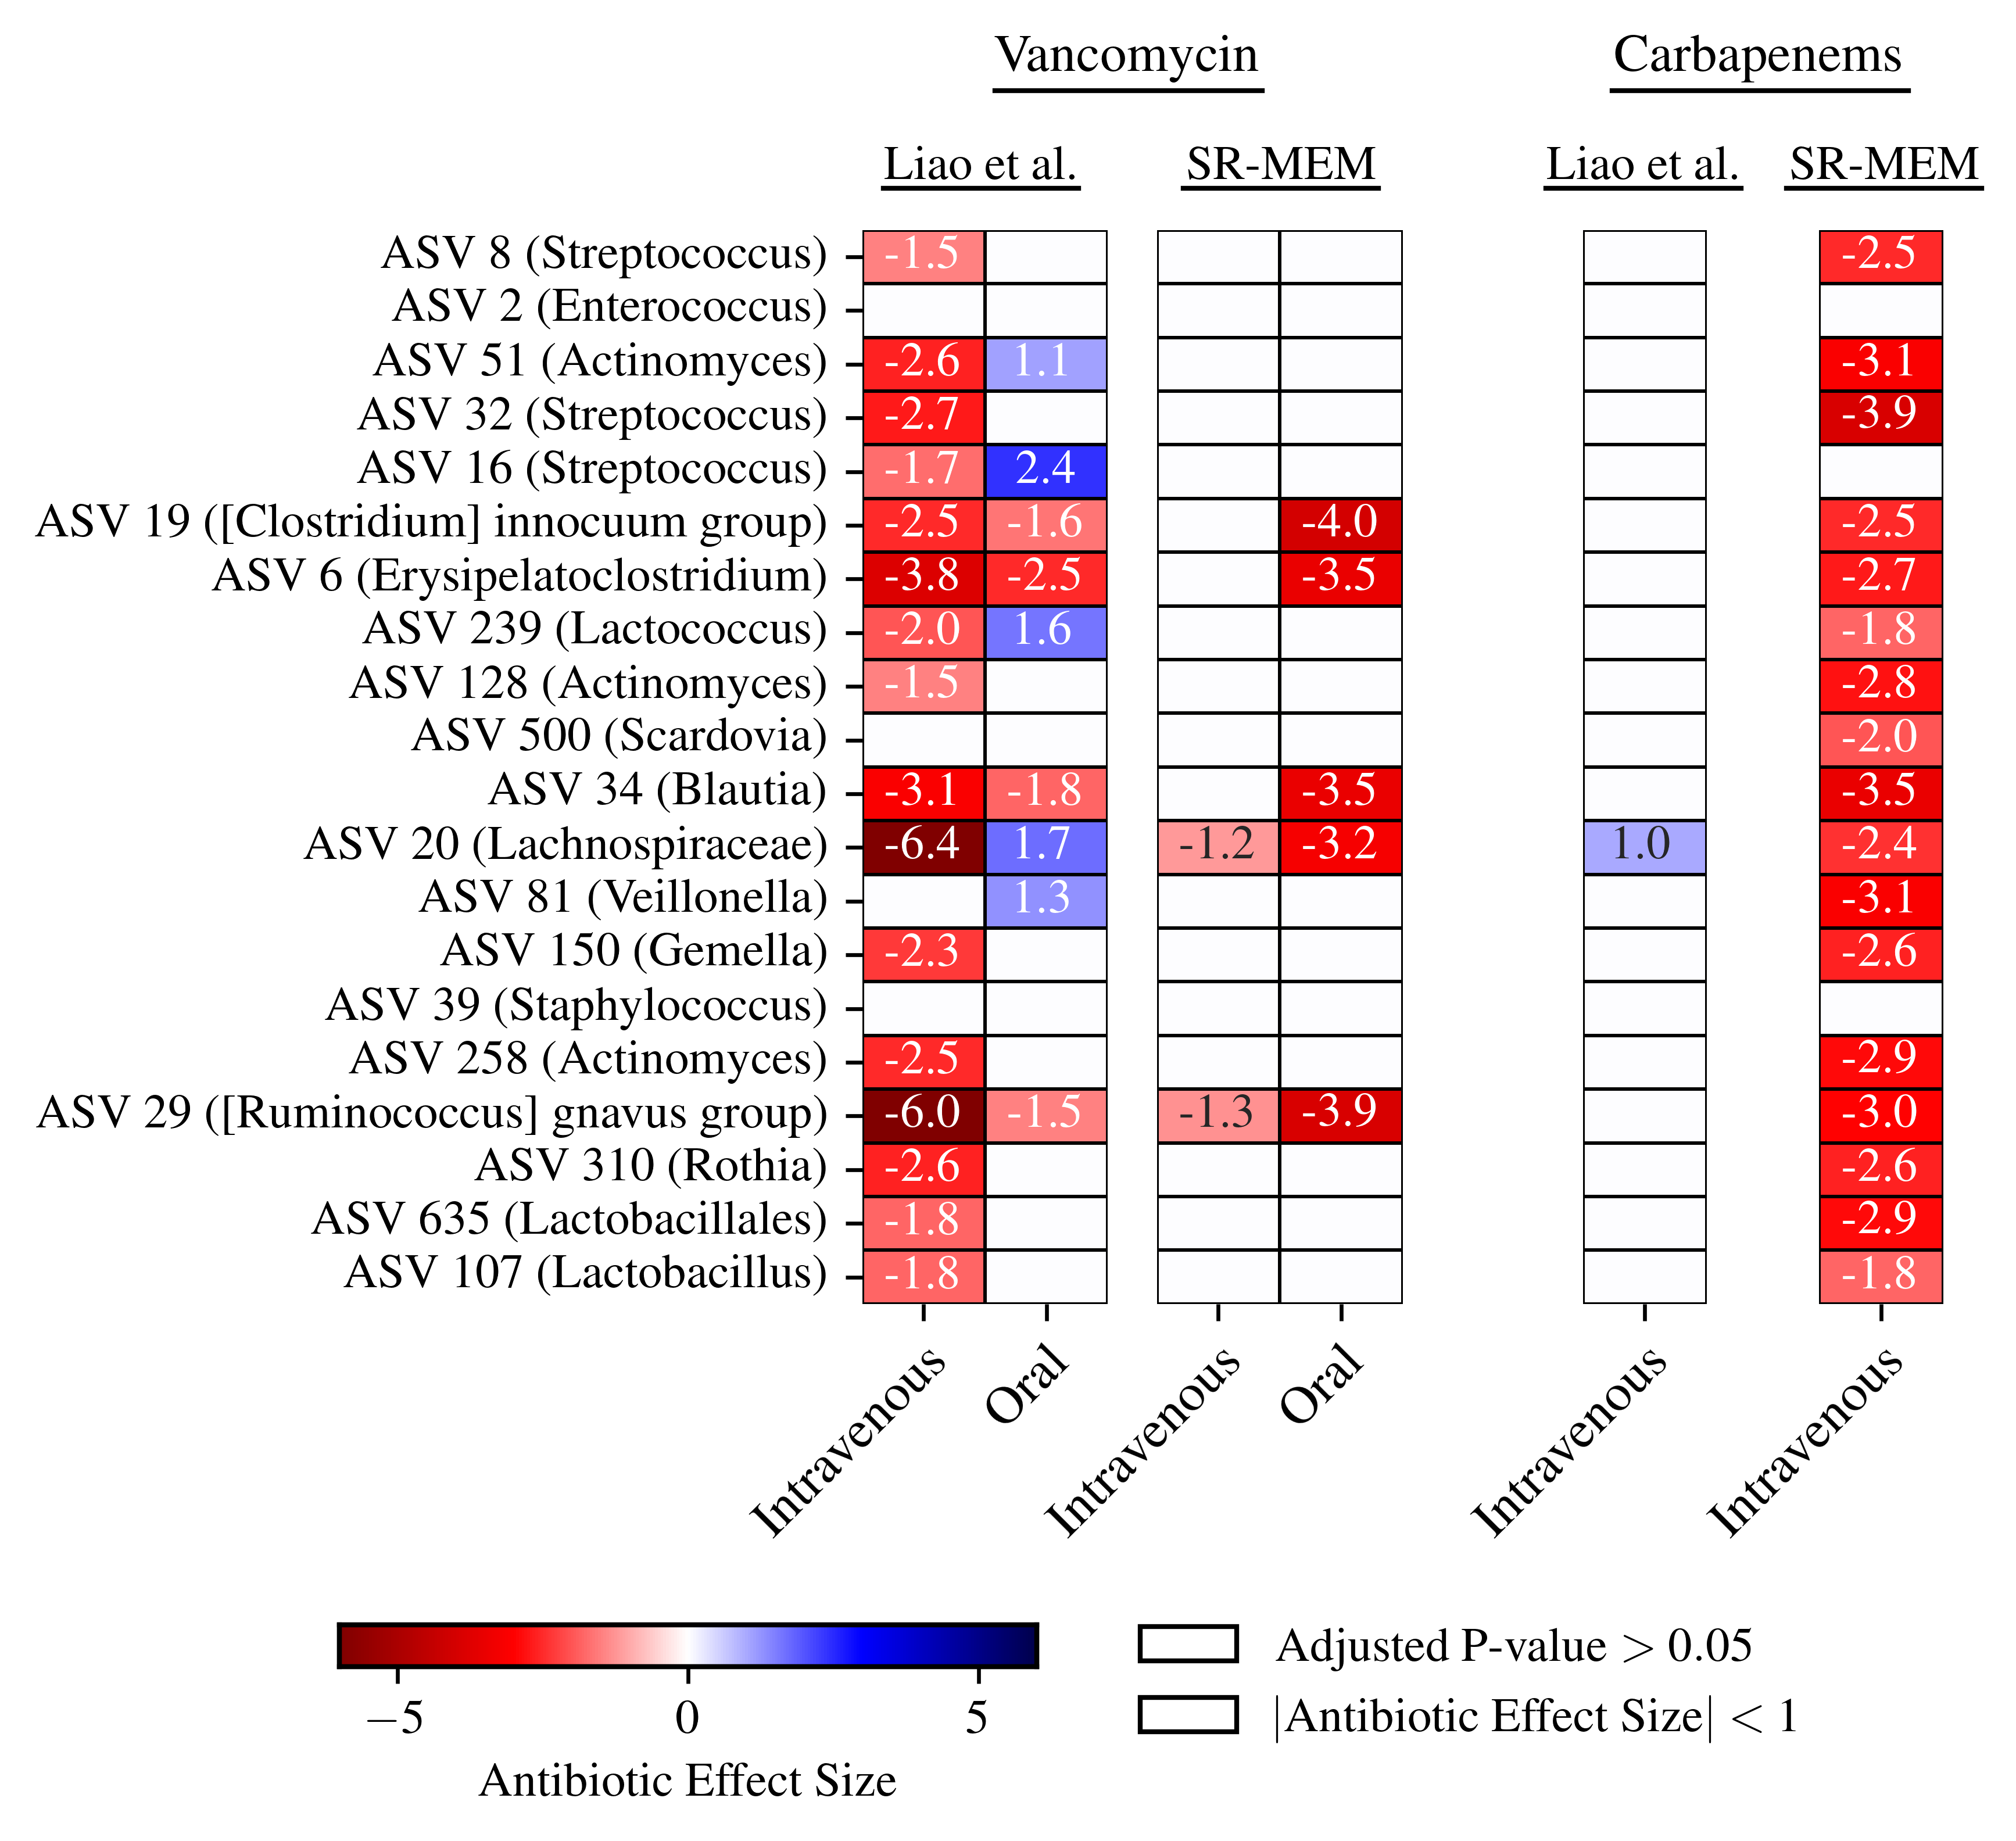

In [4]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 4
height = 4
dpi = 600
pw = width*dpi
ph = height*dpi
fontsize=11
color_map = {'grey': 0, 'blue': 1, 'red': -1}

fig = plt.figure(figsize=(pw/dpi, ph/dpi), dpi=dpi, constrained_layout=False)
square=False
sparsity_color="Greys"
log2_colors="Greys"
hspace_a = -0.68
hspace_b = -0.825

gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.66, 0.44], wspace=0.4)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], wspace=0.2)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1], wspace=0.9)
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])
ax3 = fig.add_subplot(gs1[0])
ax4 = fig.add_subplot(gs1[1])
#ax2 = subfigs.add_subplot(gs1[0])
#ax3 = subfigs.add_subplot(gs1[1])
### C ###

liao_vanc_df = liao_vanc_df.round(1)
liao_vanc_df[(liao_vanc_df > -1) & (liao_vanc_df < 1)] = 0
annot_labels = np.where(liao_vanc_df != 0, liao_vanc_df.astype(str), "")
sns.heatmap(
    data=liao_vanc_df,
    annot=annot_labels,
    fmt="",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    ax=ax1, square=square)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")

vanc_df = vanc_df.round(1)
annot_labels = np.where(vanc_df != 0, vanc_df.astype(str), "")
sns.heatmap(
    data=vanc_df,
    annot=annot_labels, 
    fmt="",
    yticklabels=False,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    ax=ax2, square=square)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,
                   va='top', ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")

liao_carb_df = liao_carb_df.round(1)
liao_carb_df[(liao_carb_df > -1) & (liao_carb_df < 1)] = 0
annot_labels = np.where(liao_carb_df != 0, liao_carb_df.astype(str), "")
sns.heatmap(
    data=liao_carb_df,
    annot=annot_labels, 
    fmt="",
    yticklabels=False,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    ax=ax3, square=square)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")

carb_df = carb_df.round(1)
annot_labels = np.where(carb_df != 0, carb_df.astype(str), "")
cbar_ax = fig.add_axes([-0.25, -0.15, 0.5, 0.03])
sns.heatmap(
    data=carb_df,
    annot=annot_labels, 
    fmt="",
    yticklabels=False,
    xticklabels=True,
    cbar=True,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    ax=ax4, square=square,
    cbar_kws={'orientation': 'horizontal',
              'label': 'Antibiotic Effect Size'},
    cbar_ax = cbar_ax
)

ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")
square_1 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='Adjusted P-value $> 0.05$')
square_2 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='$|$Antibiotic Effect Size$|$ $<1$')
ax4.legend(handles=[square_1, square_2], frameon=False, bbox_to_anchor=(0.25, -0.26))

# Add border to colorbar
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.0)
    spine.set_edgecolor('black')  # Optional: customize color

fig.text(0.41, 1.02, "Vancomycin", ha='right', va='top', fontsize=fontsize)
fig.add_artist(plt.Line2D([0.22, 0.412], [0.98, 0.98], color='black', linewidth=1))
fig.text(0.28, 0.94, "Liao et al.", ha='right', va='top', fontsize=fontsize-1)
fig.add_artist(plt.Line2D([0.14, 0.28], [0.91, 0.91], color='black', linewidth=1))
fig.text(0.495, 0.94, "SR-MEM", ha='right', va='top', fontsize=fontsize-1)
fig.add_artist(plt.Line2D([0.355, 0.495], [0.91, 0.91], color='black', linewidth=1))

fig.text(0.872, 1.02, "Carbapenems", ha='right', va='top', fontsize=fontsize)
fig.add_artist(plt.Line2D([0.6625, 0.875], [0.98, 0.98], color='black', linewidth=1))
fig.text(0.755, 0.94, "Liao et al.", ha='right', va='top', fontsize=fontsize-1)
fig.add_artist(plt.Line2D([0.615, 0.755], [0.91, 0.91], color='black', linewidth=1))
fig.text(0.9275, 0.94, "SR-MEM", ha='right', va='top', fontsize=fontsize-1)
fig.add_artist(plt.Line2D([0.7875, 0.9275], [0.91, 0.91], color='black', linewidth=1))

fig.savefig('../../../figures/Figure_4.png', bbox_inches='tight')

In [5]:
liao_oral = liao_oral[['cephalosporins', 'glycopeptide_antibiotics',
    'macrolide_derivatives', 'metronidazole',
    'oxazolidinone_antibiotics', 'penicillins', 'quinolones',
    'sulfonamides']]
liao_intra = liao_intra[['aztreonam', 'carbapenems',
       'cephalosporins', 'glycopeptide_antibiotics',
       'metronidazole', 'oxazolidinone_antibiotics',
       'penicillins', 'quinolones']]
srm_oral = ests[["cephalosporins_oral", "glycopeptide_antibiotics_oral",
                 "macrolide_derivatives_oral", "metronidazole_oral",
                 "oxazolidinone_antibiotics_oral", "penicillins_oral",
                 "quinolones_oral", "sulfonamides_oral"]]
srm_intra = ests[["aztreonam_intravenous", "carbapenems_intravenous",
                  "cephalosporins_intravenous", "glycopeptide_antibiotics_intravenous",
                  "metronidazole_intravenous", "oxazolidinone_antibiotics_intravenous",
                  "penicillins_intravenous", "quinolones_intravenous"]]
liao_oral.columns = ['Cephalosporins', 'Glycopeptide Antibiotics', 'Macrolide Derivatives',
                     'Metronidazole', 'Oxazolidinone Antibiotics', 'Penicillins',
                     'Quinolones', 'Sulfonamides']
srm_oral.columns = ['Cephalosporins', 'Glycopeptide Antibiotics', 'Macrolide Derivatives',
                     'Metronidazole', 'Oxazolidinone Antibiotics', 'Penicillins',
                     'Quinolones', 'Sulfonamides']
liao_intra.columns = ['Aztreonam', 'Carbapenems', 'Cephalosporins',
                     'Glycopeptide Antibiotics', 'Metronidazole',
                     'Oxazolidinone Antibiotics', 'Penicillins', 'Quinolones']
srm_intra.columns = ['Aztreonam', 'Carbapenems', 'Cephalosporins',
                     'Glycopeptide Antibiotics', 'Metronidazole',
                     'Oxazolidinone Antibiotics', 'Penicillins', 'Quinolones']

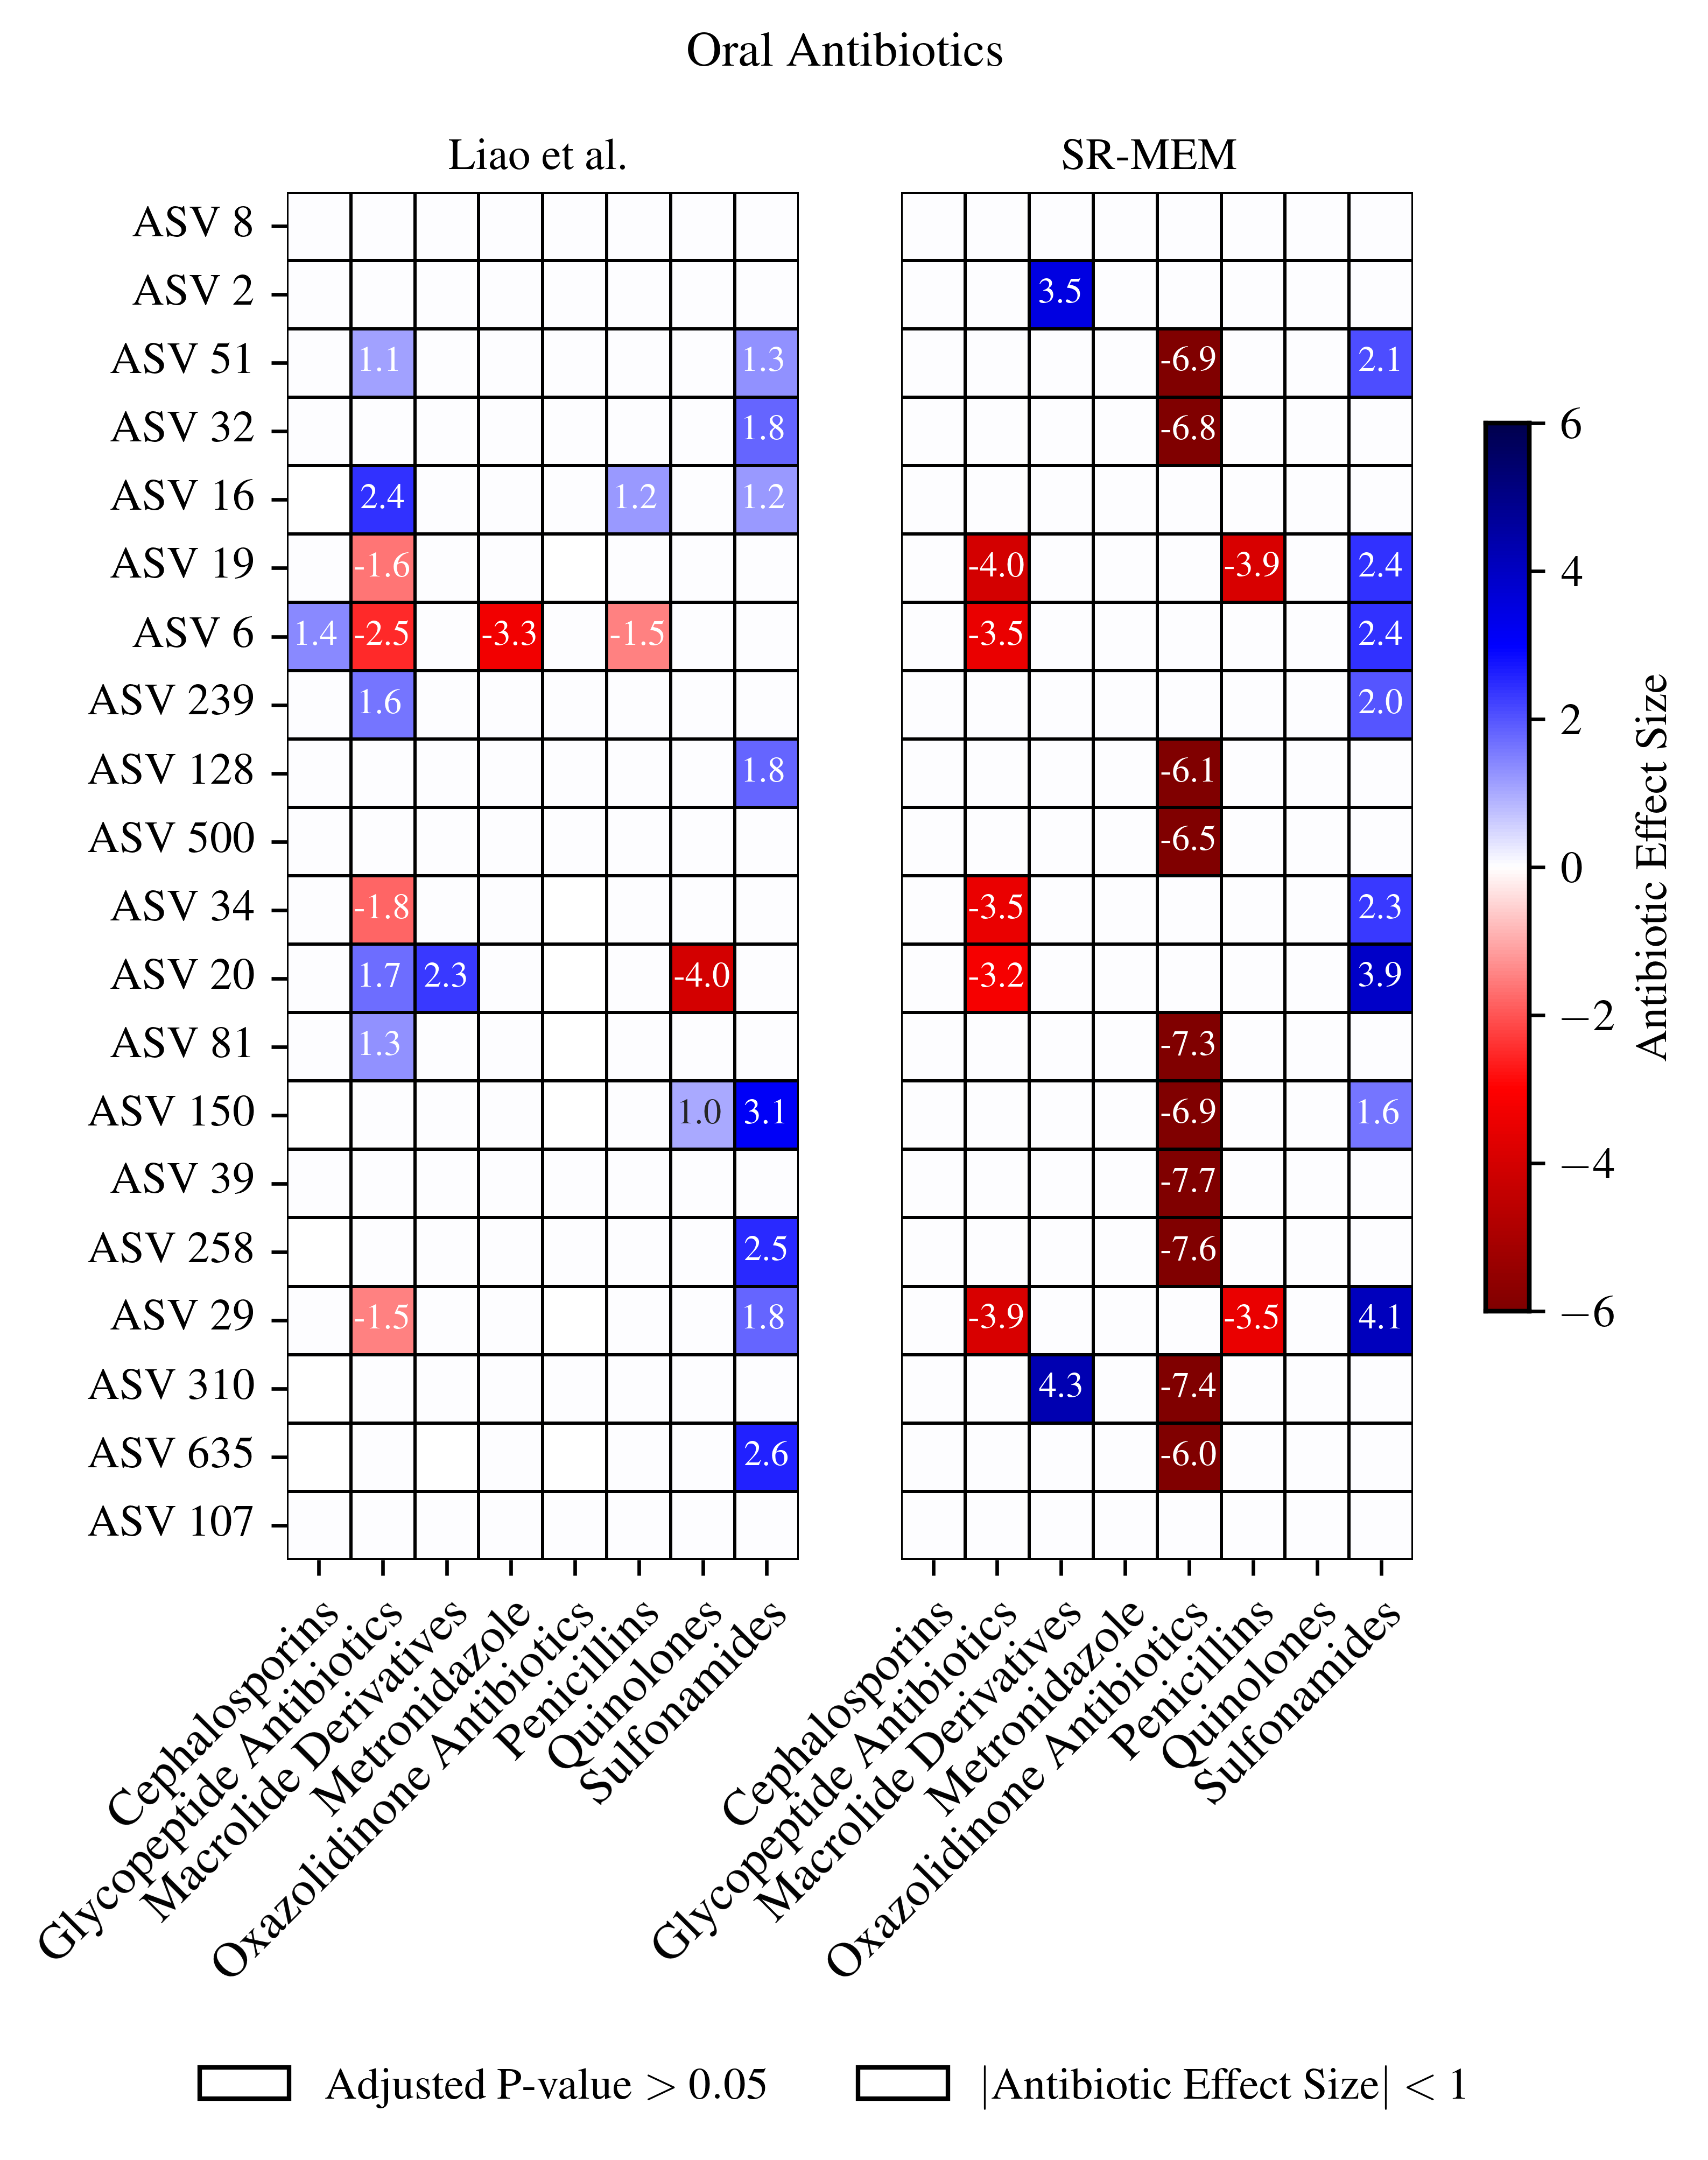

In [6]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 4.5
height = 5.5
dpi = 600
pw = width*dpi
ph = height*dpi
fontsize=11
color_map = {'grey': 0, 'blue': 1, 'red': -1}

fig = plt.figure(figsize=(pw/dpi, ph/dpi), dpi=dpi, constrained_layout=False)
square=False
sparsity_color="Greys"
log2_colors="Greys"
hspace_a = -0.68
hspace_b = -0.825

gs = gridspec.GridSpec(1, 1, figure=fig, hspace=0.3)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])

liao_oral = liao_oral.round(1)
liao_oral[(liao_oral > -1) & (liao_oral < 1)] = 0
annot_labels = np.where(liao_oral != 0, liao_oral.astype(str), "")
sns.heatmap(
    data=liao_oral,
    annot=annot_labels, 
    fmt="",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    annot_kws={"size": fontsize-3},
    ax=ax1, square=square)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")
clean_labels = [re.sub(r"\s*\(.*?\)", "", label.get_text()) for label in ax1.get_yticklabels()]
ax1.set_yticklabels(clean_labels)

srm_oral = srm_oral.round(1)
srm_oral[(srm_oral > -1) & (srm_oral < 1)] = 0
annot_labels = np.where(srm_oral != 0, srm_oral.astype(str), "")
cbar_ax = fig.add_axes([0.95, 0.25, 0.03, 0.5])
sns.heatmap(
    data=srm_oral,
    annot=annot_labels, 
    fmt="",
    yticklabels=False,
    xticklabels=True,
    cbar=True,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    annot_kws={"size": fontsize-3},
    ax=ax2, square=square,
    cbar_kws={'orientation': 'vertical',
              'label': 'Antibiotic Effect Size'},
    cbar_ax = cbar_ax)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")
square_1 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='Adjusted P-value $> 0.05$')
square_2 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='$|$Antibiotic Effect Size$|$ $<1$')
ax2.legend(handles=[square_1, square_2], frameon=False, bbox_to_anchor=(1.2, -0.34), ncol=2)

fig.text(0.62, 0.97, "Oral Antibiotics", ha='right', va='top', fontsize=fontsize)
fig.text(0.36, 0.91, "Liao et al.", ha='right', va='top', fontsize=fontsize-1)
fig.text(0.78, 0.91, "SR-MEM", ha='right', va='top', fontsize=fontsize-1)

# Add border to colorbar
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.0)
    spine.set_edgecolor('black')  # Optional: customize color

fig.savefig('../../../supplement/SFigure_4.png', bbox_inches='tight')

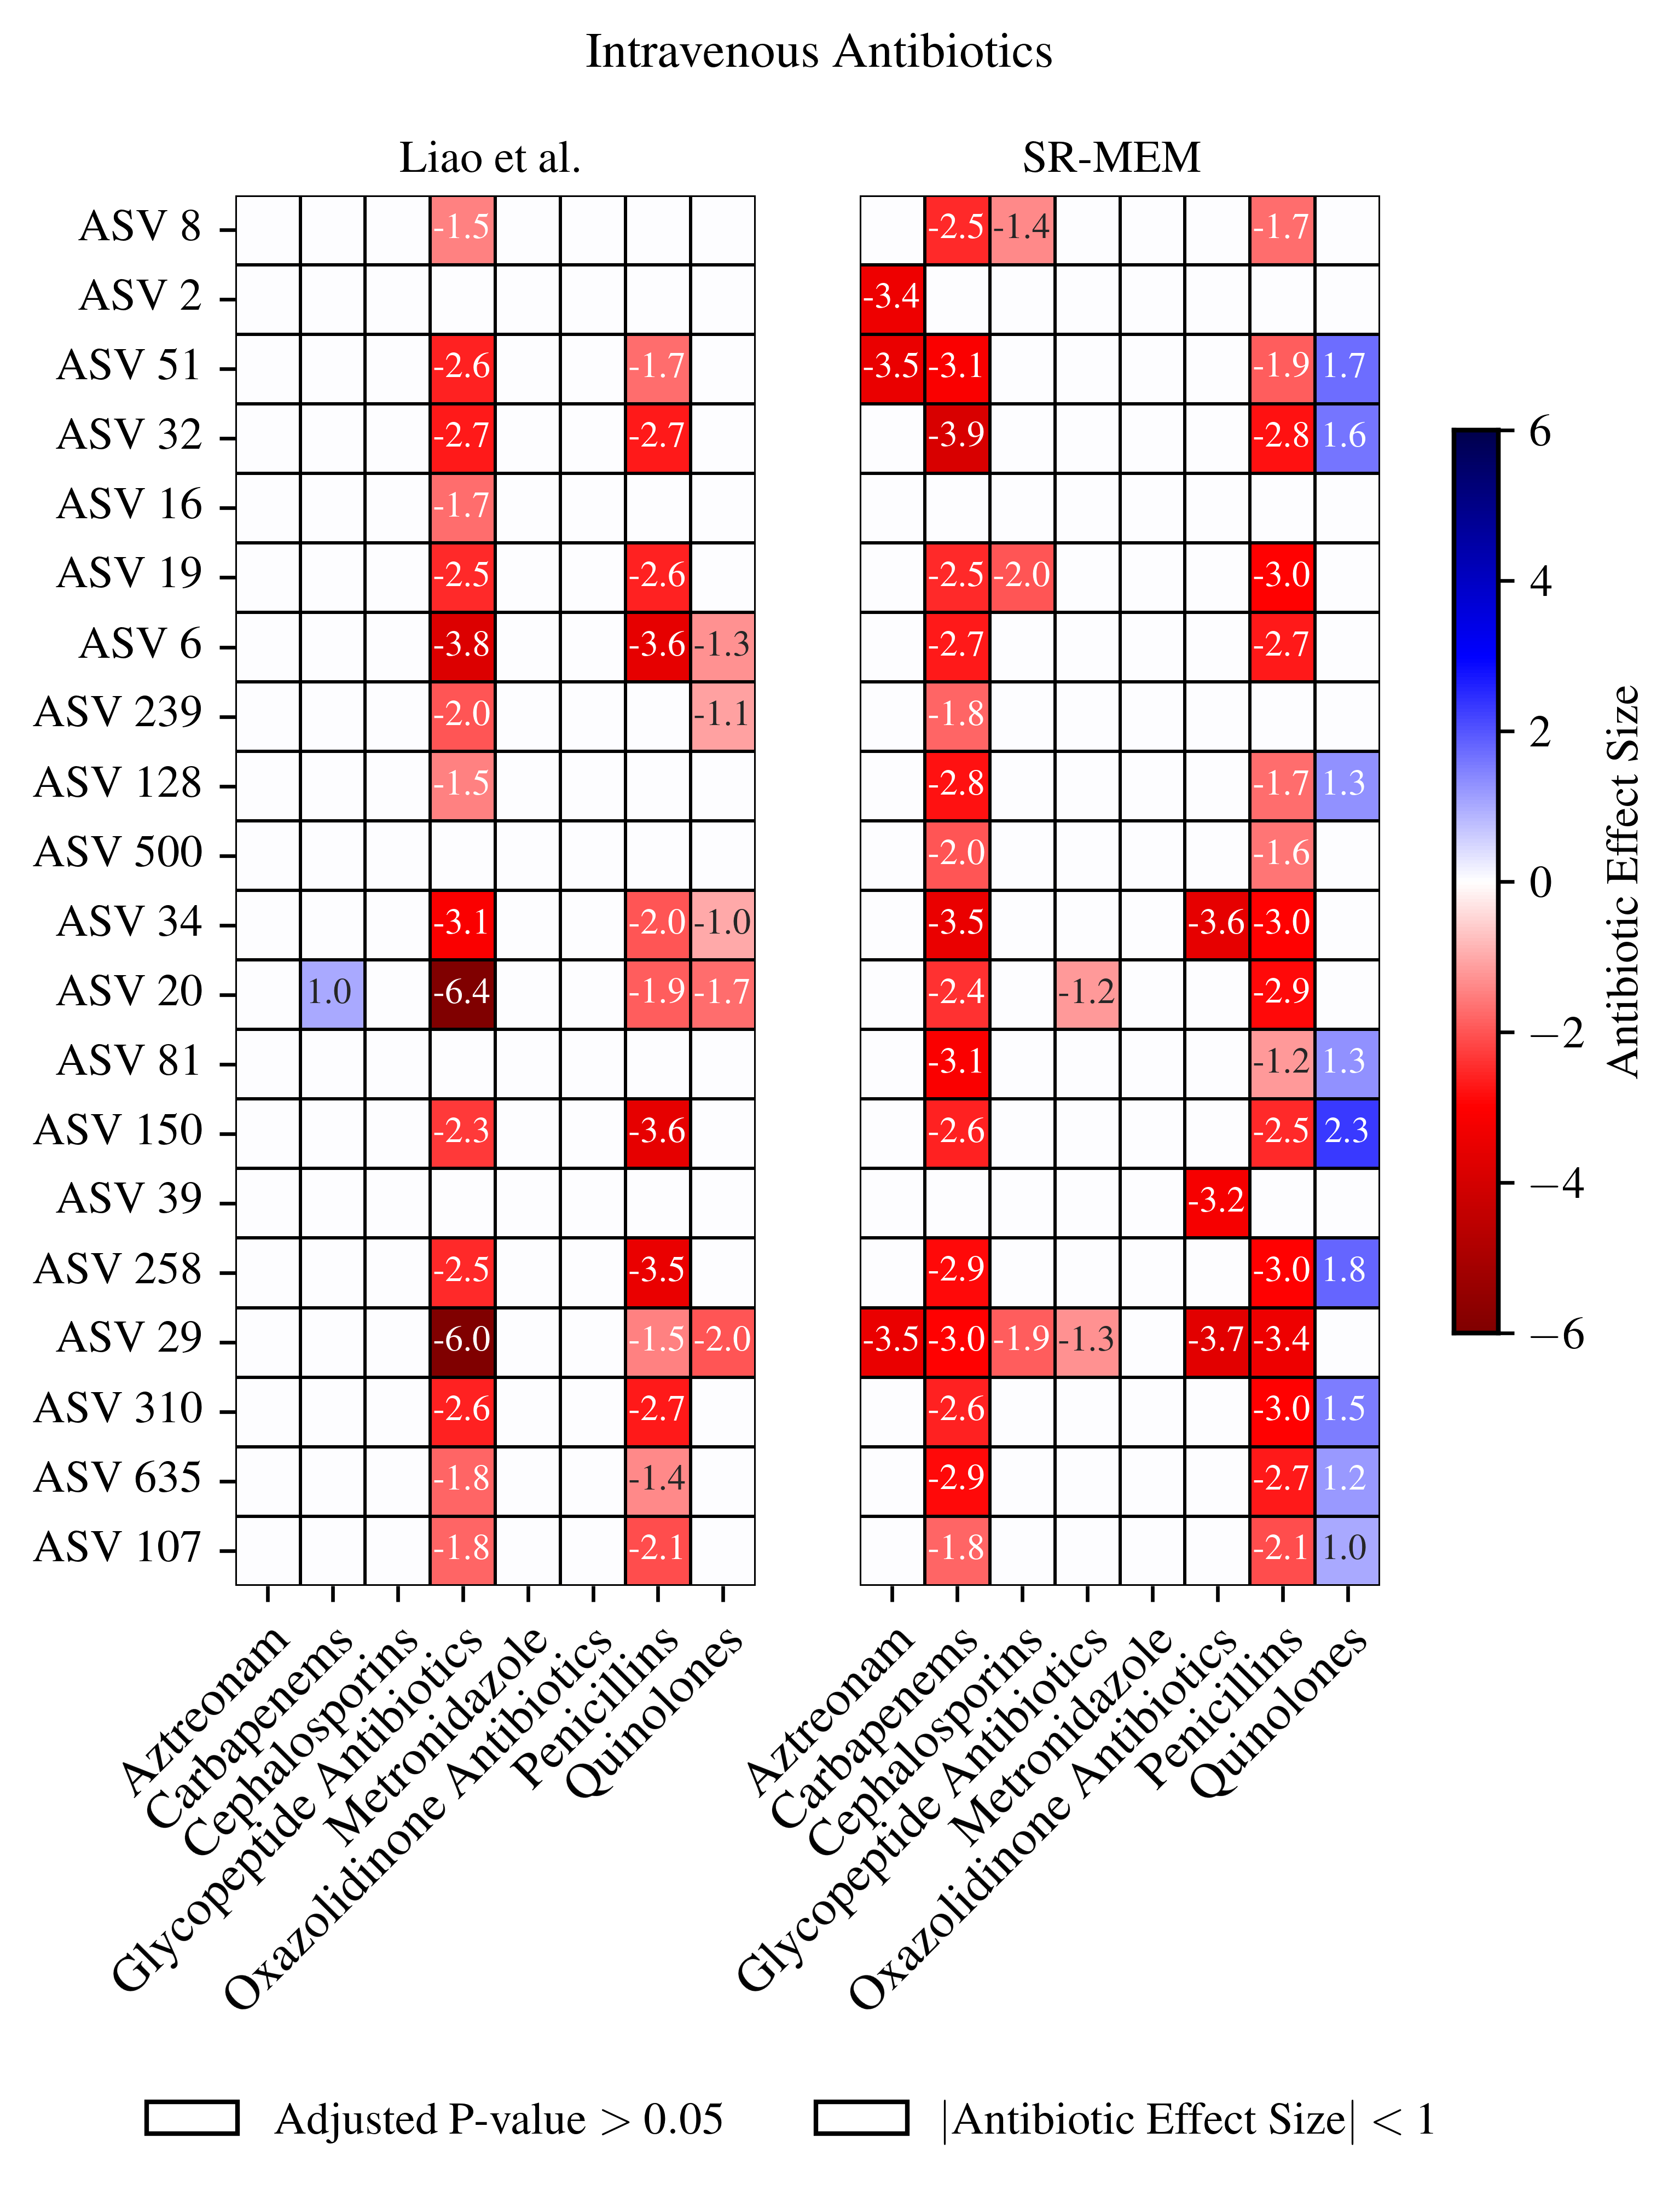

In [7]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 4.5
height = 5.5
dpi = 600
pw = width*dpi
ph = height*dpi
fontsize=11
color_map = {'grey': 0, 'blue': 1, 'red': -1}

fig = plt.figure(figsize=(pw/dpi, ph/dpi), dpi=dpi, constrained_layout=False)
square=False
sparsity_color="Greys"
log2_colors="Greys"
hspace_a = -0.68
hspace_b = -0.825

gs = gridspec.GridSpec(1, 1, figure=fig, hspace=0.3)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])

liao_intra = liao_intra.round(1)
liao_intra[(liao_intra > -1) & (liao_intra < 1)] = 0
annot_labels = np.where(liao_intra != 0, liao_intra.astype(str), "")
sns.heatmap(
    data=liao_intra,
    annot=annot_labels, 
    fmt="",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    annot_kws={"size": fontsize-3},
    ax=ax1, square=square)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")
clean_labels = [re.sub(r"\s*\(.*?\)", "", label.get_text()) for label in ax1.get_yticklabels()]
ax1.set_yticklabels(clean_labels)

srm_intra = srm_intra.round(1)
srm_intra[(srm_intra > -1) & (srm_intra < 1)] = 0
annot_labels = np.where(srm_intra != 0, srm_intra.astype(str), "")
cbar_ax = fig.add_axes([0.95, 0.25, 0.03, 0.5])
sns.heatmap(
    data=srm_intra,
    annot=annot_labels, 
    fmt="",
    yticklabels=False,
    xticklabels=True,
    cbar=True,
    linecolor="black",
    linewidths=0.5,
    cmap="seismic_r",
    center=0, vmin=-6, vmax=6,
    annot_kws={"size": fontsize-3},
    ax=ax2, square=square,
    cbar_kws={'orientation': 'vertical',
              'label': 'Antibiotic Effect Size'},
    cbar_ax = cbar_ax)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', va='top',
                    fontsize=fontsize, rotation_mode="anchor")
square_1 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='Adjusted P-value $> 0.05$')
square_2 = mpatches.Patch(facecolor='white', edgecolor='black', 
                          label='$|$Antibiotic Effect Size$|$ $<1$')
ax2.legend(handles=[square_1, square_2], frameon=False, bbox_to_anchor=(1.2, -0.34), ncol=2)

fig.text(0.68, 0.97, "Intravenous Antibiotics", ha='right', va='top', fontsize=fontsize)
fig.text(0.36, 0.91, "Liao et al.", ha='right', va='top', fontsize=fontsize-1)
fig.text(0.78, 0.91, "SR-MEM", ha='right', va='top', fontsize=fontsize-1)

# Add border to colorbar
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.0)
    spine.set_edgecolor('black')  # Optional: customize color

fig.savefig('../../../supplement/SFigure_5.png', bbox_inches='tight')